# Data Mining Project Part 2:  EXPLORATORY DATA ANALYSIS AND VISUALIZATION

# Tasks:

### Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv('vaccination_tweets.csv')
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",NaN,Twitter Web App,2,6,False
11016,1460809350792896516,Sujan,NaN,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",NaN,Twitter Web App,3,5,False
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False


# ASSIGNMENT: MACHINE LEARNING APPLICATION
### Introduction: In this phase, your expertise in machine learning comes into play. The client expects you to choose the most suitable machine learning techniques, justify your choices, and create a robust pipeline for identifying patterns within the dataset.
### Tasks:
### 1. Machine Learning Technique Selection and Justification (15 marks):
### • Choose appropriate machine learning techniques for the task at hand. Justify your choices based on the dataset's characteristics and the problem's requirements.

### Answer:

For sentiment analysis on text data, several machine learning techniques can be considered on my datasets characteristics:
Consider the following below techntechniques that can be used:

#### 1. Naive Bayes Classifier:
       It's efficient, works well with text data, and requires less computational resources. However, it assumes independence between features.
#### 2. Support Vector Machines (SVM):
     SVMs help to handle high-dimensional data efficiently, making them suitable for text classification tasks. They work well in scenarios with a clear margin of separation.
#### 3. Transformer Models (e.g., BERT, GPT):
    These models, pre-trained on whole, have shown remarkable performance in natural language understanding tasks,including sentiment analysis. They can help to capture complex patterns and context in text data.
#### 4. Ensemble Methods (e.g., Random Forest, Gradient Boosting):
    Combining multiple models can often enhance performance, especially when dealing with diverse text data.  Choice  of    technique might depend on factors like the size of your dataset, computational resources available, desired                        interpretability of the model, and the level of accuracy required for sentiment analysis.
     
## My Choice: 
    By considering the characteristics of my dataset and the nature of sentiment analysis, SVMs appear suitable due to their efficiency with text data, ability to handle high-dimensional features, and capability to create clear decision         boundaries between sentiment classes. Additionally, their potential for robust performance and generalization makes them a viable choice for this task.


# 2. Pipeline Explanation (20 marks):
### Develop a step-by-step machine learning pipeline that clearly outlines how the chosen techniques will be applied. This should include preprocessing steps, feature engineering, model selection, and training.

In [3]:
import pandas as pd
import numpy as np
import re  # For regular expressions
import seaborn as sns
import matplotlib.pyplot as plt
import wordninja as wi
from matplotlib import style
# style.use('ggplot')
style.use('classic')
import nltk
from textblob import TextBlob  # To process text using TextBlob library
from nltk.tokenize import word_tokenize  # Tokenization of words
from nltk.stem import PorterStemmer  # For stemming words
from nltk.corpus import stopwords  # Stopwords for text processing
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud  # For generating word clouds
from sklearn.feature_extraction.text import CountVectorizer  # For creating bag-of-words model
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay 
# Evaluation metrics for classification
from sklearn.svm import LinearSVC

In [4]:
df = pd.read_csv('vaccination_tweets.csv')

In [5]:
columns_to_drop = ['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet']
text_df = df.drop(columns=columns_to_drop, axis=1)

In [6]:
selected_columns = ['text'] 
text_df = df[selected_columns]
text_df

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...
...,...
11015,"The number of Covid-19 cases today, 17 Novembe..."
11016,First dose ✅\n#PfizerBioNTech
11017,"The number of Covid-19 cases today, 16 Novembe..."
11018,#PfizerBioNTech has developed new pill #Paxlov...


In [7]:
print(text_df['text'].iloc[0],"\n") #raw data
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [8]:
#using of the regix Expression to remove the secial characters
# Load stopwords
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [9]:
text_df.text = text_df['text'].apply(data_processing)

C:\Users\husna\AppData\Local\Temp\ipykernel_1296\3414959154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df.text = text_df['text'].apply(data_processing)


In [10]:
text_df = text_df.drop_duplicates('text')

In [11]:
stemmer = PorterStemmer() # reduce word to root/stem
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [12]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

C:\Users\husna\AppData\Local\Temp\ipykernel_1296\3156068889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text'] = text_df['text'].apply(lambda x: stemming(x))


In [13]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [14]:
text_df['polarity'] = text_df['text'].apply(polarity)


C:\Users\husna\AppData\Local\Temp\ipykernel_1296\585886137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['polarity'] = text_df['text'].apply(polarity)


In [15]:
## Sentimental Analysis
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [16]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment) #lexicon-based approach


C:\Users\husna\AppData\Local\Temp\ipykernel_1296\1948024681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['sentiment'] = text_df['polarity'].apply(sentiment) #lexicon-based approach


<AxesSubplot:xlabel='sentiment', ylabel='count'>

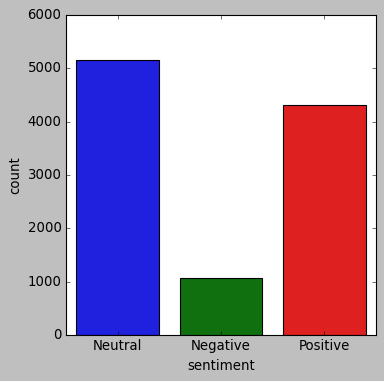

In [17]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

In [18]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= True) #high priorty first      #Change here
#if do it true it will give the Lowest priorty first
pos_tweets.head()


,text,polarity,sentiment
7013,whole world experimental testing ground indust...,1.850372e-17,Positive
9329,deltavariant far hard time reopened thanks con...,2.777778e-03,Positive
9599,many men refuse take covid19 vaccine regularly...,4.166667e-03,Positive
7913,major side effects report second dose pfizerbi...,4.166667e-03,Positive
10657,got pfizer booster yesterday sore arm slight f...,4.166667e-03,Positive


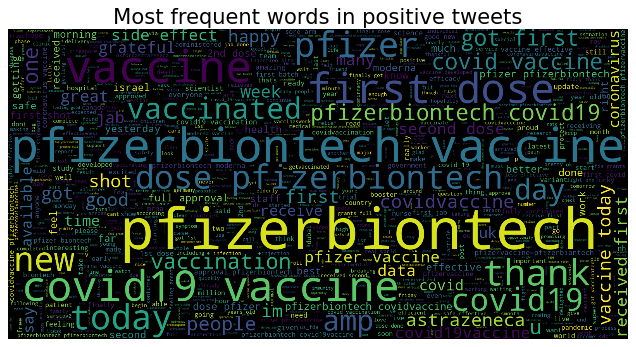

In [19]:
text = ' '.join([word for word in pos_tweets['text']]) 
# Combine all the text from positive tweets into a single string

plt.figure(figsize=(10,10), facecolor='None')
wordcloud = WordCloud(max_words=800, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [20]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending=False)# changed here
neg_tweets.head()

,text,polarity,sentiment
2912,work skilled nursing facility got first vaccin...,-0.003333,Negative
7256,200321 752308 vaccinations new daily record da...,-0.003409,Negative
2073,ukgovernment cant even vaccinate properly ethi...,-0.004762,Negative
7715,got first dose less waiting time airport vacci...,-0.005556,Negative
7157,nas_k27 second dose due end next month well fa...,-0.006250,Negative


In [21]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False ) #change here
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
7347,anyone else feel like framing vaccine card pfi...,0.0,Neutral
7458,looking forward getting second pfizer shot any...,0.0,Neutral
7454,never thought id running diff vaccine modernav...,0.0,Neutral
7453,john___m dont get choose one person know asked...,0.0,Neutral


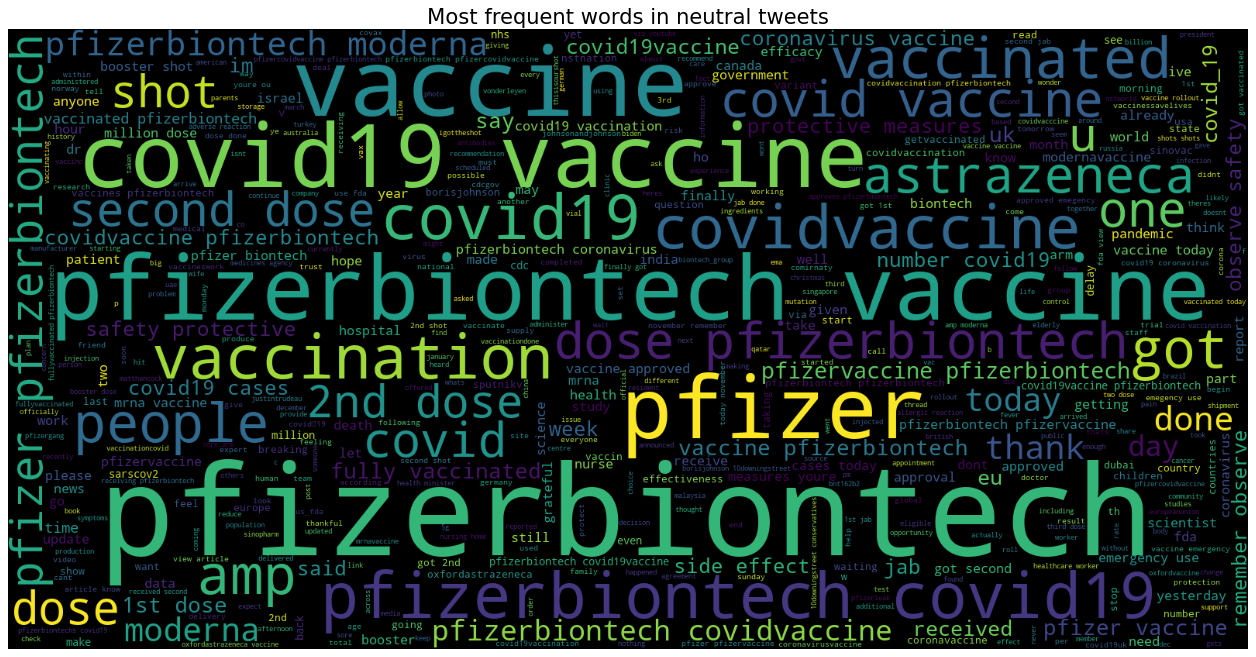

In [22]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [23]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])
#Convert Text to the matrix of the tokens


In [24]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X) #count vector ---> convert to numeric

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)


In [26]:
print("Size of x_train:", (x_train.shape))     #x_train and y_train refers to the input features
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))     #x_test and y_test refer to the output featuers or target variables
print("Size of y_test:", (y_test.shape))

Size of x_train: (5271, 78583)
Size of y_train: (5271,)
Size of x_test: (5272, 78583)
Size of y_test: (5272,)


In [27]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

C:\Users\husna\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [28]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)

In [29]:
# Apply sentiment labels based on polarity values
text_df['sentiment'] = text_df['polarity'].apply(sentiment)


C:\Users\husna\AppData\Local\Temp\ipykernel_1296\4175389947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['sentiment'] = text_df['polarity'].apply(sentiment)


# 3. Results Training, Testing and Validation (15 marks):
## • Train the model. Test and validate the machine learning results using appropriate metrics. Discuss the chosen metrics and their relevance to the problem

 Training Method:   
        
        Model is trained above using the SVM Algorithms 

## Accuracy:

In [30]:
print("Test Accuracy:", svc_acc*100,"%")

Test Accuracy: 84.52200303490136 %


Confusion Matrix:
[[ 182  269   92]
 [  12 2482   46]
 [  29  368 1792]]


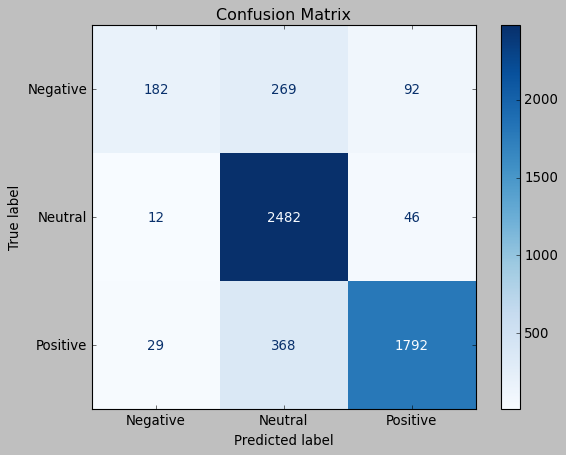

In [31]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, svc_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=SVCmodel.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()



In [32]:
# Additional metrics
print("Classification Report:")
print(classification_report(y_test, svc_pred))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.34      0.48       543
     Neutral       0.80      0.98      0.88      2540
    Positive       0.93      0.82      0.87      2189

    accuracy                           0.85      5272
   macro avg       0.85      0.71      0.74      5272
weighted avg       0.85      0.85      0.83      5272



In [33]:
def perform_sentiment_analysis(text):
    # Create a TextBlob object
    blob = TextBlob(text)

    # Perform sentiment analysis
    sentiment_score = blob.sentiment.polarity

    # Determine sentiment label
    if sentiment_score < 0:
        sentiment = "Negative"
    elif sentiment_score == 0:
        sentiment = "Neutral"
    else:
        sentiment = "Positive"

    return sentiment

# Main loop for user input
while True:
    user_input = input("Enter a sentence (or 'exit' to quit): ")
    
    if user_input.lower() == 'exit':
        break
    
    sentiment = perform_sentiment_analysis(user_input)
    print(f"Sentiment: {sentiment}")


Enter a sentence (or 'exit' to quit): Medicine killed 1000 people
Sentiment: Negative
Enter a sentence (or 'exit' to quit): I'm good
Sentiment: Positive
Enter a sentence (or 'exit' to quit): Thank you very much
Sentiment: Positive
Enter a sentence (or 'exit' to quit): The COVID-19 induced lockdown could negatively affect changes in eating behavior, physical activity, and mental health
Sentiment: Negative
Enter a sentence (or 'exit' to quit): exit


# 4. Python Notebook Development (15 marks):
### •Create a well-documented Python notebook demonstrating the implementation of the machine learning pipeline. Include necessary explanations, code, and plots to ensure clarity.

Answer:
    This part is already done in the above code. which help to understand and give clear clarity related to the codes
    

# Distribution of Polarity Scores:


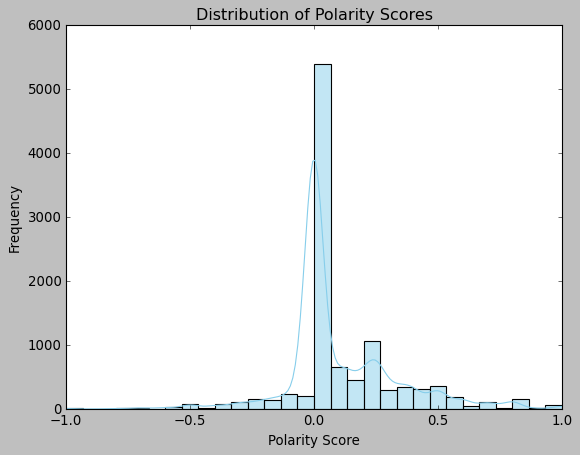

In [34]:
# Distribution of Polarity Scores
plt.figure(figsize=(8, 6))
sns.histplot(text_df['polarity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()


# Boxplot of Polarity Scores by Sentiment:

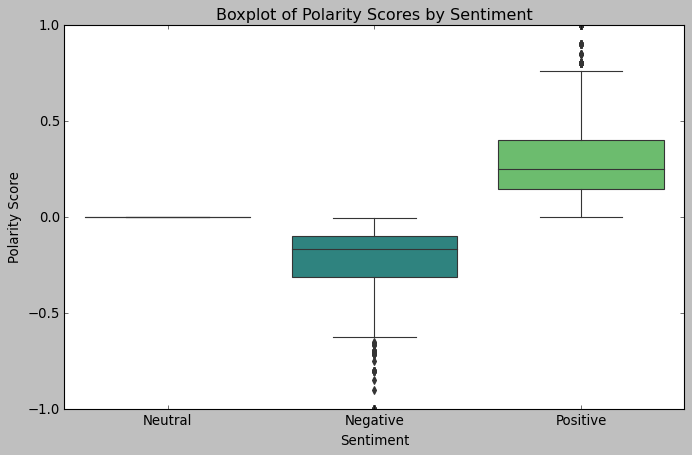

In [35]:
# Boxplot of Polarity Scores by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='polarity', data=text_df, palette='viridis')
plt.title('Boxplot of Polarity Scores by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Polarity Score')
plt.show()


# Scatter Plot of Polarity vs. Word Count:

C:\Users\husna\AppData\Local\Temp\ipykernel_1296\1244675333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['word_count'] = text_df['text'].apply(lambda x: len(x))


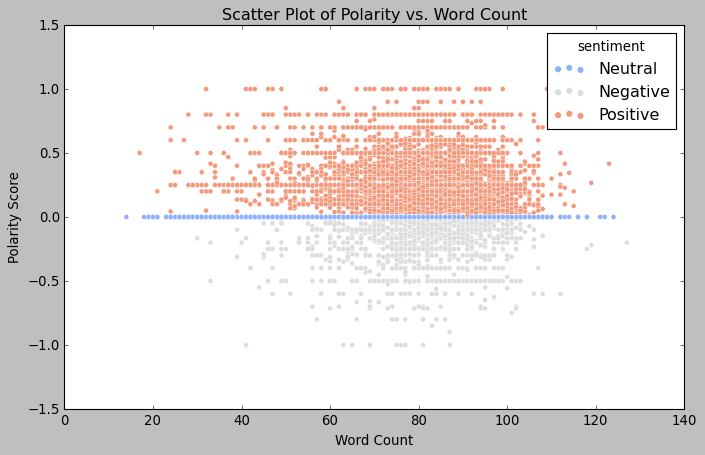

In [36]:
# Scatter Plot of Polarity vs. Word Count
text_df['word_count'] = text_df['text'].apply(lambda x: len(x))
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='polarity', data=text_df, hue='sentiment', palette='coolwarm')
plt.title('Scatter Plot of Polarity vs. Word Count')
plt.xlabel('Word Count')
plt.ylabel('Polarity Score')
plt.show()


# Bar Plot of Sentiment Counts:

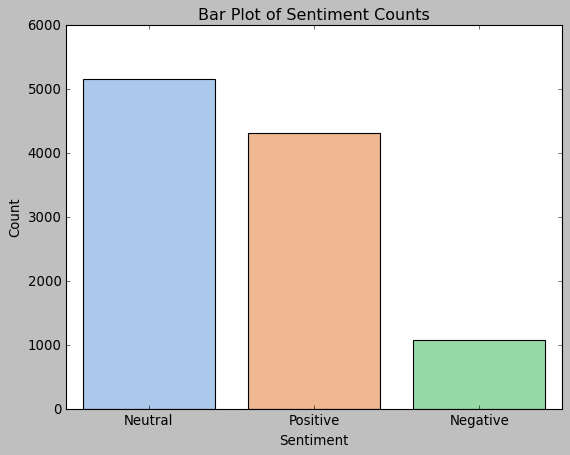

In [37]:
# Bar Plot of Sentiment Counts
sentiment_counts = text_df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
plt.title('Bar Plot of Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# Violin Plot of Word Count by Sentiment:

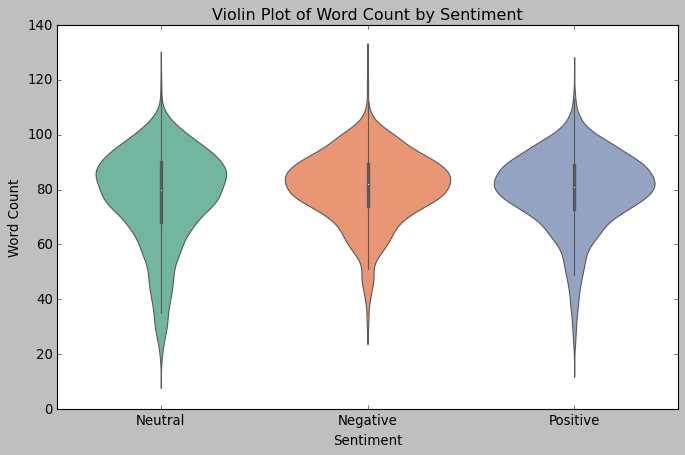

In [38]:
# Violin Plot of Word Count by Sentiment
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment', y='word_count', data=text_df, palette='Set2')
plt.title('Violin Plot of Word Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()


# Bar Plot of Average Polarity by Sentiment:

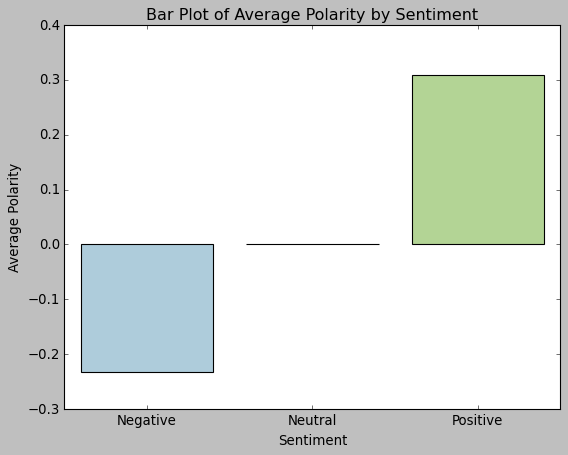

In [39]:
# Bar Plot of Average Polarity by Sentiment
average_polarity_by_sentiment = text_df.groupby('sentiment')['polarity'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=average_polarity_by_sentiment.index, y=average_polarity_by_sentiment.values, palette='Paired')
plt.title('Bar Plot of Average Polarity by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Polarity')
plt.show()


# Density Plot of Polarity by Sentiment

C:\Users\husna\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


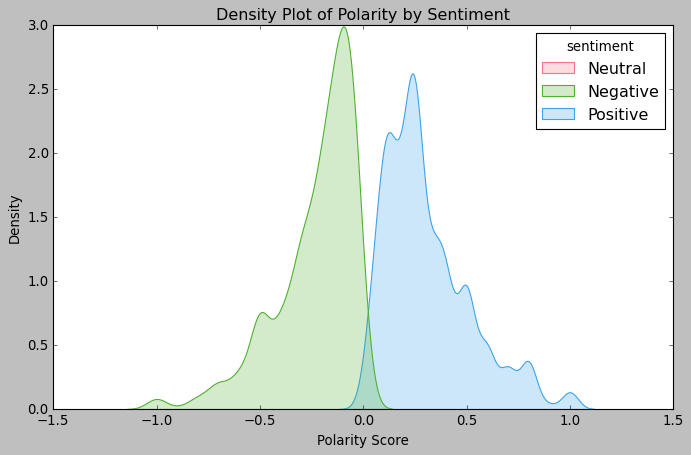

In [40]:
# Density Plot of Polarity by Sentiment
plt.figure(figsize=(10, 6))
sns.kdeplot(data=text_df, x='polarity', hue='sentiment', fill=True, common_norm=False, palette='husl')
plt.title('Density Plot of Polarity by Sentiment')
plt.xlabel('Polarity Score')
plt.ylabel('Density')
plt.show()
